# Introduction to NumPy

This class outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

- For example, images–particularly digital images–can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
- Sound clips can be thought of as one-dimensional arrays of intensity versus time.
- Text can be converted in various ways into numerical representations, perhaps binary digits representing the frequency of certain words or pairs of words.
No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers.
(We will discuss some specific examples of this process later in [Feature Engineering](05.04-Feature-Engineering.ipynb))

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package.

This chapter will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.


In [1]:
import numpy
numpy.__version__

'1.17.3'

For the pieces of the package discussed here, I'd recommend NumPy version 1.8 or later.
By convention, you'll find that most people in the SciPy/PyData world will import NumPy using ``np`` as an alias:

In [2]:
import numpy as np
np

<module 'numpy' from 'Z:\\Data_Science\\Software\\Python\\Python_3.6.4\\lib\\site-packages\\numpy\\__init__.py'>

Throughout this chapter, and indeed the rest of the book, you'll find that this is the way we will import and use NumPy.

## Reminder about Built In Documentation

As you read through this chapter, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature), as well as the documentation of various functions (using the ``?`` character – Refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

For example, to display all the contents of the numpy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas  are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [3]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [4]:
print("x1 ndim: ", x1.ndim)
print("x1 shape:", x1.shape)
print("x1 size: ", x1.size)

x1 ndim:  1
x1 shape: (6,)
x1 size:  6


Another useful attribute is the ``dtype``, the data type of the array

In [5]:
print("dtype:", x3.dtype)

dtype: int32


In [6]:
x1 = np.zeros(6)  # One-dimensional array
x2 = np.ones((3, 4)) # Two-dimensional array
x3 = np.ones((3, 4, 5))  # Three-dimensional array

In [7]:
x2


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [8]:
x3

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [9]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [10]:
x1

array([0., 0., 0., 0., 0., 0.])

In [11]:
x1[0]

0.0

In [12]:
x1[4]

0.0

To index from the end of the array, you can use negative indices:

In [13]:
x1[-1]

0.0

In [14]:
x1[-2]

0.0

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [15]:
x2

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
x2[0, 0]

1.0

In [17]:
x2[2, 0]

1.0

In [18]:
x2[2, -1]

1.0

Values can also be modified using any of the above index notation:

In [19]:
x2[0, 0] = 12
x2

array([[12.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [20]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3.14159, 0.     , 0.     , 0.     , 0.     , 0.     ])

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

In [21]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [23]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [24]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [25]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [26]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [27]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [28]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [29]:
x2

array([[12.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [30]:
x2[:2, :3]  # two rows, three columns

array([[12.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [31]:
x2[:3, ::2]  # all rows, every other column

array([[12.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Finally, subarray dimensions can even be reversed together:

In [32]:
x2[::-1, ::-1]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., 12.]])

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [33]:
print(x2[:, 0])  # first column of x2

[12.  1.  1.]


In [34]:
print(x2[0, :])  # first row of x2

[12.  1.  1.  1.]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [35]:
print(x2[0])  # equivalent to x2[0, :]

[12.  1.  1.  1.]


### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [36]:
print(x2)

[[12.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


Let's extract a $2 \times 2$ subarray from this:

In [37]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12.  1.]
 [ 1.  1.]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [38]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99.  1.]
 [ 1.  1.]]


In [39]:
print(x2)

[[99.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [40]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99.  1.]
 [ 1.  1.]]


If we now modify this subarray, the original array is not touched:

In [41]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42.  1.]
 [ 1.  1.]]


In [42]:
print(x2)

[[99.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [43]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [44]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [45]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [46]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [47]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [48]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [49]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [50]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [51]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [52]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [53]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [54]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, ``np.dstack`` will stack arrays along the third axis.

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [55]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

In [56]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [57]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [58]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Whether the more convenient notation is worth the additional overhead will depend on your own application.

# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [59]:
import numpy as np

In [60]:
L = np.random.random(100)
sum(L)

52.12818058833704

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [61]:
np.sum(L)

52.12818058833702

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [62]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

102 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
736 µs ± 123 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [63]:
min(big_array), max(big_array)

(1.4057692298008462e-06, 0.9999994392723005)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [64]:
np.min(big_array), np.max(big_array)

(1.4057692298008462e-06, 0.9999994392723005)

In [65]:
%timeit min(big_array)
%timeit np.min(big_array)

62 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
364 µs ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [66]:
print(big_array.min(), big_array.max(), big_array.sum())

1.4057692298008462e-06 0.9999994392723005 500202.5348847683


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [67]:
M = np.random.random((3, 4))
print(M)

[[0.50063048 0.07383653 0.49018646 0.72521956]
 [0.84926562 0.10226215 0.99559424 0.59250301]
 [0.53509    0.88518089 0.25518136 0.13130483]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [68]:
M.sum()

6.1362551272647154

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [69]:
M.min(axis=0)

array([0.50063048, 0.07383653, 0.25518136, 0.13130483])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [70]:
M.max(axis=1)

array([0.72521956, 0.99559424, 0.88518089])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [71]:
!head -4 ../data/president_heights.csv

head: cannot open '../data/president_heights.csv' for reading: No such file or directory


In [73]:
import pandas as pd
data = pd.read_csv('../../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [74]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [75]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib. For example, this code generates the following chart:

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

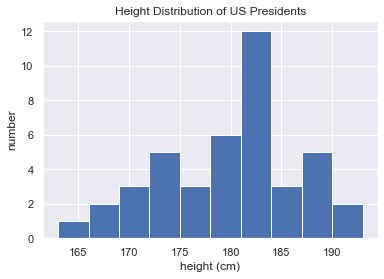

In [77]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')